In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('abalone.data', 
                 header=None, 
                 names=['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'])
df['Sex'] = df['Sex'].astype('str')

### 7.11a


R-squared value:  0.527629939992


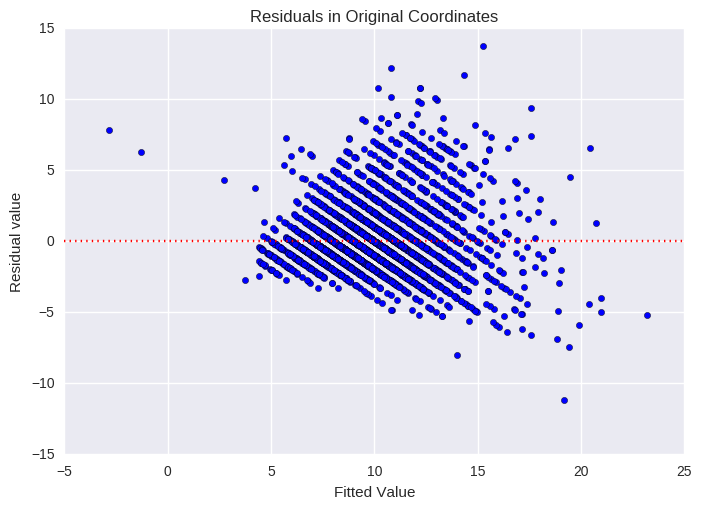

In [3]:
# This line constructs the linear regression. Mass is a function of Fore + Bicep + ...
# Result just calculates the coefficents and the Intercept along with 
# R value among other things.
result = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell', data=df).fit()
print('R-squared value: ', result.rsquared)

# vals_zero is just a dictionary that contains the coefficents. I'm constructing the prediction(s).
vals_zero = result.params
pred = vals_zero['Intercept'] + (df['Length'] * vals_zero['Length']) +  (df['Diameter'] * vals_zero['Diameter']) +  (df['Height'] * vals_zero['Height']) \
+ (df['Whole'] * vals_zero['Whole']) + (df['Shucked'] * vals_zero['Shucked']) + (df['Viscera'] * vals_zero['Viscera']) + (df['Shell'] * vals_zero['Shell']) \

plt.figure()

# Draws a horizontal line across the graph at y=0
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, df['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11b

In [4]:
mod_df = df.copy(deep=True)
l = list(mod_df['Sex'])
for i in range(len(l)):
    if(l[i] == 'M'):
        l[i] = 1
    elif(l[i] == 'F'):
        l[i] = 0
    else:
        l[i] = -1
mod_df['Sex'] = pd.Series(l)
#mod_df

R-squared value:  0.535344576494


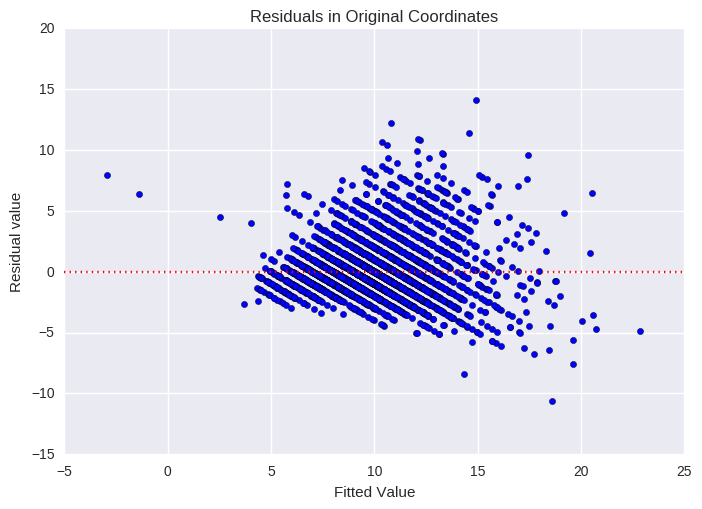

In [5]:
result2 = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell + Sex', data=mod_df).fit()

print('R-squared value: ', result2.rsquared)

vals_zero = result2.params
pred = vals_zero['Intercept'] + (mod_df['Length'] * vals_zero['Length']) +  (mod_df['Diameter'] * vals_zero['Diameter']) +  (mod_df['Height'] * vals_zero['Height']) \
+ (mod_df['Whole'] * vals_zero['Whole']) + (mod_df['Shucked'] * vals_zero['Shucked']) + (mod_df['Viscera'] * vals_zero['Viscera']) + (mod_df['Shell'] * vals_zero['Shell']) \
+ (mod_df['Sex'] * vals_zero['Sex'])


plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11c

In [6]:
mod_df2 = df.copy(deep=True)
del mod_df2['Sex']
mod_df2['Rings'] = mod_df2['Rings'].apply(np.log)

R-squared value:  0.585469932732


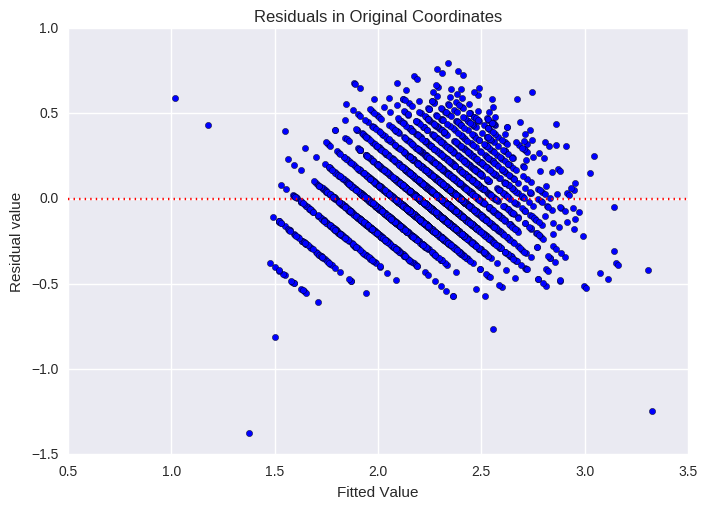

In [8]:
result_one = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell', data=mod_df2).fit()

print('R-squared value: ', result_one.rsquared)


vals_one = result_one.params
pred = vals_one['Intercept'] + (mod_df2['Length'] * vals_one['Length']) +  (mod_df2['Diameter'] * vals_one['Diameter']) +  (mod_df2['Height'] * vals_one['Height']) \
+ (mod_df2['Whole'] * vals_one['Whole']) + (mod_df2['Shucked'] * vals_one['Shucked']) + (mod_df2['Viscera'] * vals_one['Viscera']) + (mod_df2['Shell'] * vals_one['Shell']) \


plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df2['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11d

In [9]:
mod_df3 = df.copy(deep=True)
l = list(mod_df3['Sex'])
for i in range(len(l)):
    if(l[i] == 'M'):
        l[i] = 1
    elif(l[i] == 'F'):
        l[i] = 0
    else:
        l[i] = -1
mod_df3['Sex'] = pd.Series(l)
mod_df3['Rings'] = mod_df3['Rings'].apply(np.log)

R-squared value:  0.595988033283


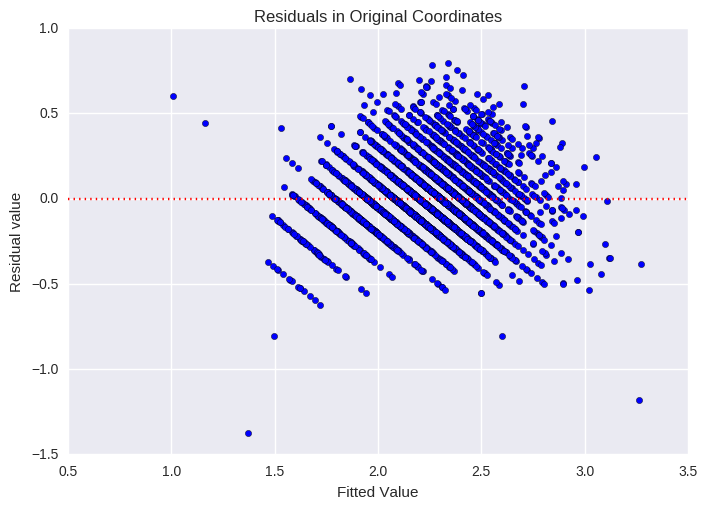

In [11]:
result_one = smf.ols(formula='Rings ~ Length + Diameter + Height + Whole + Shucked + Viscera + Shell + Sex', data=mod_df3).fit()


print('R-squared value: ', result_one.rsquared)


vals_one = result_one.params
pred = vals_one['Intercept'] + (mod_df3['Length'] * vals_one['Length']) +  (mod_df3['Diameter'] * vals_one['Diameter']) +  (mod_df3['Height'] * vals_one['Height']) \
+ (mod_df3['Whole'] * vals_one['Whole']) + (mod_df3['Shucked'] * vals_one['Shucked']) + (mod_df3['Viscera'] * vals_one['Viscera']) + (mod_df3['Shell'] * vals_one['Shell']) \
+ (mod_df3['Sex'] * vals_one['Sex'])

plt.figure()
#plt.xscale('linear')
#plt.yscale('linear')
plt.axhline(y=0, color='r', linestyle='dotted')

plt.scatter(pred, mod_df3['Rings'] - pred) # Residual = Observed (y) - Expected (regression)
plt.title('Residuals in Original Coordinates')
plt.xlabel('Fitted Value')
plt.ylabel('Residual value')
plt.show()

#### 7.11e

After performing each of the different linear regressions. We compared the different residuals and R values and found that the residual from predicting the log age had slightly better performance (better R value and residuals) than fitting to the original 